Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


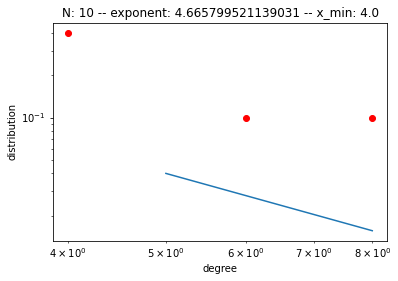

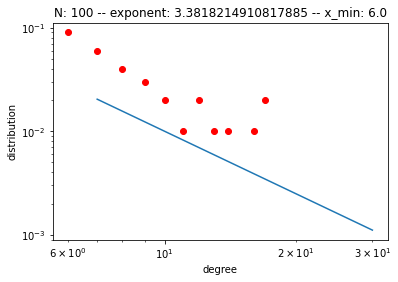

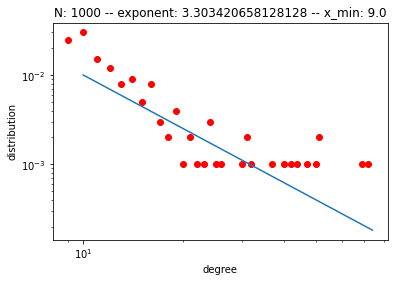

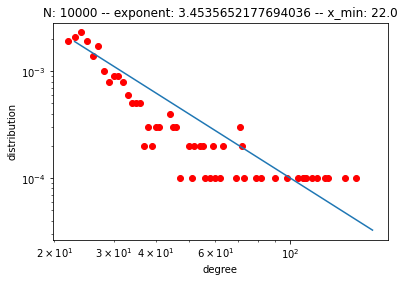

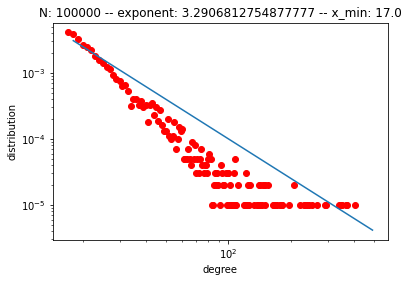

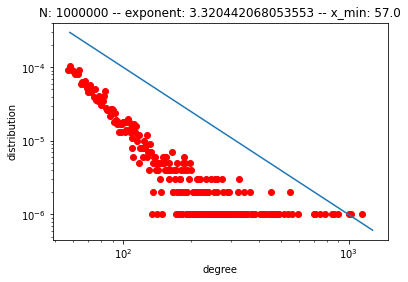

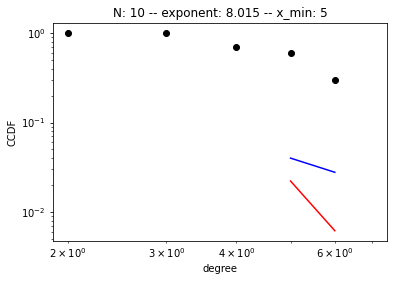

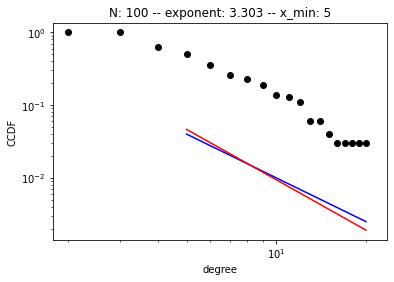

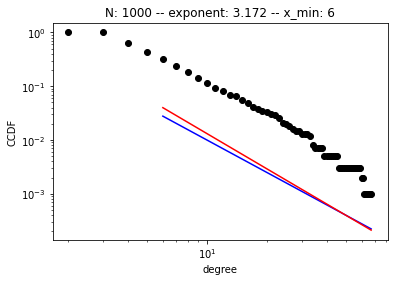

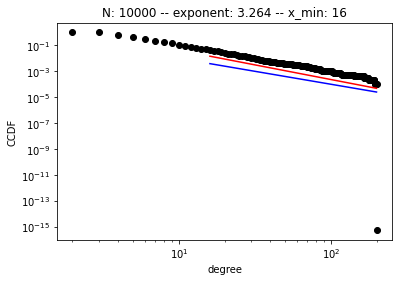

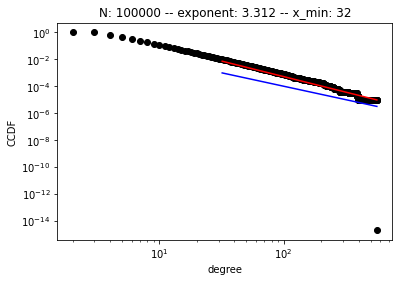

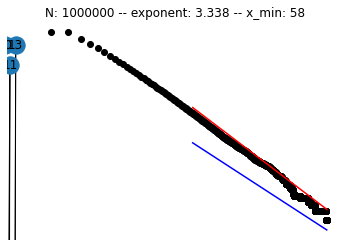

In [18]:
#Domiciano Silveira Ribeiro
#RA: 12122CCP004
!pip install python-igraph > /dev/null
!pip install cairocffi > /dev/null
!pip install powerlaw > /dev/null

import igraph as ig
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from collections import Counter
import powerlaw

#ajustada
for n in [10, 100, 1000, 10000, 100000, 1000000]:

    g_ba = ig.Graph.Barabasi(n, m=3)
    d = g_ba.degree()

    #ajusto power-law
    result = powerlaw.Fit(d)
    summary = f"N: {n} -- exponent: {result.alpha} -- x_min: {result.xmin}"

    #calculo empirical distribution
    xs = range(int(result.xmin), max(d))
    counter = Counter(d)
    dc = [counter.get(x, 0) / n for x in xs]

    fig, ax = plt.subplots()
    ax.scatter(xs, dc, label="Cumulative Distribution", marker='o', c='r')
    ax.plot(xs[1:], [x_ ** (-3 + 1) for x_ in xs[1:]], label="Theoretical distribution")
    ax.set_title(summary)
    ax.set_xlabel("degree")
    ax.set_ylabel("distribution")
    ax.set_xscale("log")
    ax.set_yscale("log")

# acumulada
for n in [10, 100, 1000, 10000, 100000, 1000000]:
#for n in [1000]:

    g_ba = ig.Graph.Barabasi(n, m=3)
    d = g_ba.degree()
    
    #ajusto power-law
    powerfit = powerlaw.Fit(d)
    summary = f"N: {n} -- exponent: {np.around(powerfit.alpha, decimals=3)} -- x_min: {int(powerfit.xmin)}"

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(d, bins=range(1, max(d)+1), density=True)
    # Now find the cdf
    cdf = np.cumsum(counts)
    ccdf = 1 - cdf

    fig, ax = plt.subplots()
    ax.scatter(bin_edges[1:], ccdf, marker='o', c='black', label="distribución acumulada complementaria (CCDF)")

    x = np.arange(powerfit.xmin, max(d))
    y_teo = np.power(x.astype('float'), (-3)+1)
    ax.plot(x, y_teo, c="blue", label="Theoretical distribution")

    y_fit = 1/(powerfit.alpha+1)* 1/powerfit.xmin * np.power(x/powerfit.xmin, -powerfit.alpha +1)
    ax.plot(x, y_fit, c="red", label="Fitted distribution")

    ax.set_title(summary)
    ax.set_xlabel("degree")
    ax.set_ylabel("CCDF")
    ax.set_xscale("log")
    ax.set_yscale("log")


import networkx as nx
G= nx.barabasi_albert_graph(50,40)
nx.draw(G, with_labels=True)

